In [1]:
import numpy as np

from models.merge import CNN, BiLSTM, ELMo, Ensemble
from data.Dataset import Dataset
from data.TrainSet import TrainSet
from data.TestSet import TestSet
from utils.utils import plot_words_cloud, plot_words_count, plot_compare_bars, plot_scores
from utils.constants import BOOKS_DIR
from mlxtend.classifier import EnsembleVoteClassifier
from keras.wrappers.scikit_learn import KerasClassifier
#dtw - distance metric

2021-11-20 15:45:26,064 : INFO : Loading model from ./elmo/...
2021-11-20 15:45:26,066 : INFO : We will cache the vocabulary of 100 tokens.
d:\study\pyenvnn\lib\site-packages\simple_elmo\model.py:529: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstm_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(
d:\study\pyenvnn\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:984: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._kernel = self.add_variable(
d:\study\pyenvnn\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:993: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._bias = self.add_variable(
d:\study\pyenvnn\lib\site-packages\keras\layers\le

Read books

In [2]:
names = ["Furman", "Garshin"]
dataset = Dataset(names)
dataset.data

,label,author,text
0,0,Furman,﻿П. Р. Фурман\nСаардамский плотник\n \n\n184...
1,1,Garshin,﻿Всеволод Михайлович Гаршин\nНадежда Николаев...


Clean text from punctuation

In [3]:
dataset.preprocess()
dataset.data

Preprocessing Garshin: 100%|██████████| 33664/33664 [00:05<00:00, 6278.54it/s]


,label,author,text
0,0,Furman,фурман саардамский плотник глава незнакомец на...
1,1,Garshin,всеволод михайлович гаршин надежда николаевна ...


VISUALIZING THE DATA

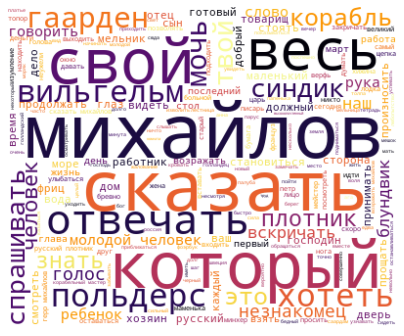

<Figure size 432x288 with 0 Axes>

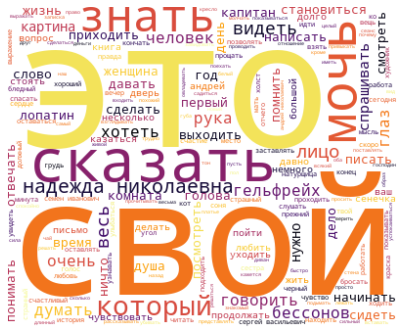

<Figure size 432x288 with 0 Axes>

In [4]:
plot_words_cloud(dataset.data)

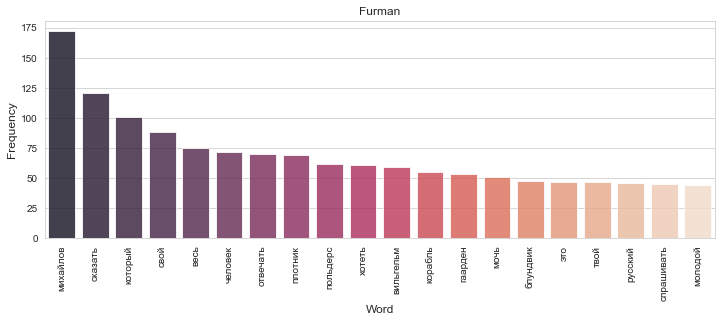

<Figure size 432x288 with 0 Axes>

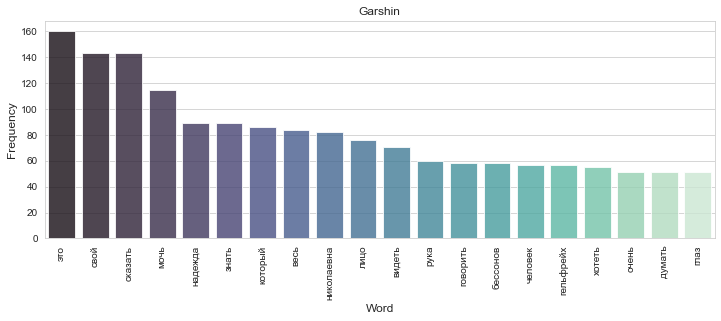

<Figure size 432x288 with 0 Axes>

In [5]:
plot_words_count(dataset.data)

Count and visualize as barplots

d:\study\pyenvnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


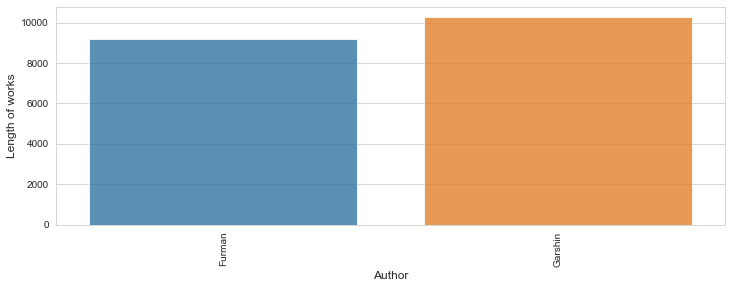

<Figure size 432x288 with 0 Axes>

In [6]:
plot_compare_bars(dataset.data)

In [7]:
dataset.chunking()
dataset.prep_data

,label,author,text
0,0,Furman,"[фурман, саардамский, плотник, глава, незнаком..."
1,0,Furman,"[ровно, набегать, берег, оставлять, каменья, ж..."
2,0,Furman,"[берег, начинать, оживляться, остроконечный, к..."
3,0,Furman,"[черный, масса, полуоконченный, смоленый, судн..."
4,0,Furman,"[узкий, деревянный, лестница, выбеливать, мука..."
...,...,...,...
251,1,Garshin,"[очень, это, жаль, это, рука, надежда, николае..."
252,1,Garshin,"[лицо, глаз, закрывать, неподвижный, чувствова..."
253,1,Garshin,"[оставлять, последний, сила, подымать, полагат..."
254,1,Garshin,"[прибавлять, соня, приезжать, вызывать, телегр..."


In [8]:
dataset.embedding(ELMo)

2021-11-20 15:45:49,797 : INFO : Warming up ELMo on 40 sentences...
2021-11-20 15:45:53,439 : INFO : Warming up finished.
2021-11-20 15:45:53,449 : INFO : Texts in the current batch: 40
2021-11-20 15:45:53,606 : INFO : Texts in the current batch: 40
2021-11-20 15:45:53,765 : INFO : Texts in the current batch: 40
2021-11-20 15:45:53,919 : INFO : Texts in the current batch: 40
2021-11-20 15:45:54,085 : INFO : Texts in the current batch: 40
2021-11-20 15:45:54,236 : INFO : Texts in the current batch: 29
2021-11-20 15:46:02,113 : INFO : Warming up ELMo on 40 sentences...
2021-11-20 15:46:02,749 : INFO : Warming up finished.
2021-11-20 15:46:02,755 : INFO : Texts in the current batch: 40
2021-11-20 15:46:02,913 : INFO : Texts in the current batch: 40
2021-11-20 15:46:03,067 : INFO : Texts in the current batch: 40
2021-11-20 15:46:03,220 : INFO : Texts in the current batch: 40
2021-11-20 15:46:03,376 : INFO : Texts in the current batch: 40
2021-11-20 15:46:03,532 : INFO : Texts in the curren

(485,)

In [9]:
dataset.prep_data

,label,author,text,embeddings
0,0,Furman,"[фурман, саардамский, плотник, глава, незнаком...","[[0.05091999098658562, -0.4666233956813812, -0..."
1,0,Furman,"[ровно, набегать, берег, оставлять, каменья, ж...","[[-0.16349318623542786, 0.3895706534385681, 0...."
2,0,Furman,"[берег, начинать, оживляться, остроконечный, к...","[[-0.2622004747390747, 0.1729711890220642, 0.2..."
3,0,Furman,"[черный, масса, полуоконченный, смоленый, судн...","[[0.3026084005832672, -0.3684127628803253, -0...."
4,0,Furman,"[узкий, деревянный, лестница, выбеливать, мука...","[[0.7458761930465698, 0.10881945490837097, 0.8..."
...,...,...,...,...
251,1,Garshin,"[очень, это, жаль, это, рука, надежда, николае...","[[-0.1528828740119934, -0.5249238014221191, -0..."
252,1,Garshin,"[лицо, глаз, закрывать, неподвижный, чувствова...","[[0.3663937449455261, -0.16386987268924713, -0..."
253,1,Garshin,"[оставлять, последний, сила, подымать, полагат...","[[0.36951836943626404, 0.10008872300386429, 0...."
254,1,Garshin,"[прибавлять, соня, приезжать, вызывать, телегр...","[[0.009569093585014343, 0.5480486750602722, 0...."


In [10]:
train_set = TrainSet(dataset.prep_data)
train_set.shape

,Train,Test,Val
X,"(350, 40, 1024)","(73, 40, 1024)","(62, 40, 1024)"
Y,"(350, 3)","(73, 3)","(62, 3)"


In [11]:
cnn = CNN(train_set.X_shape(), output_units=3)
cnn.build()

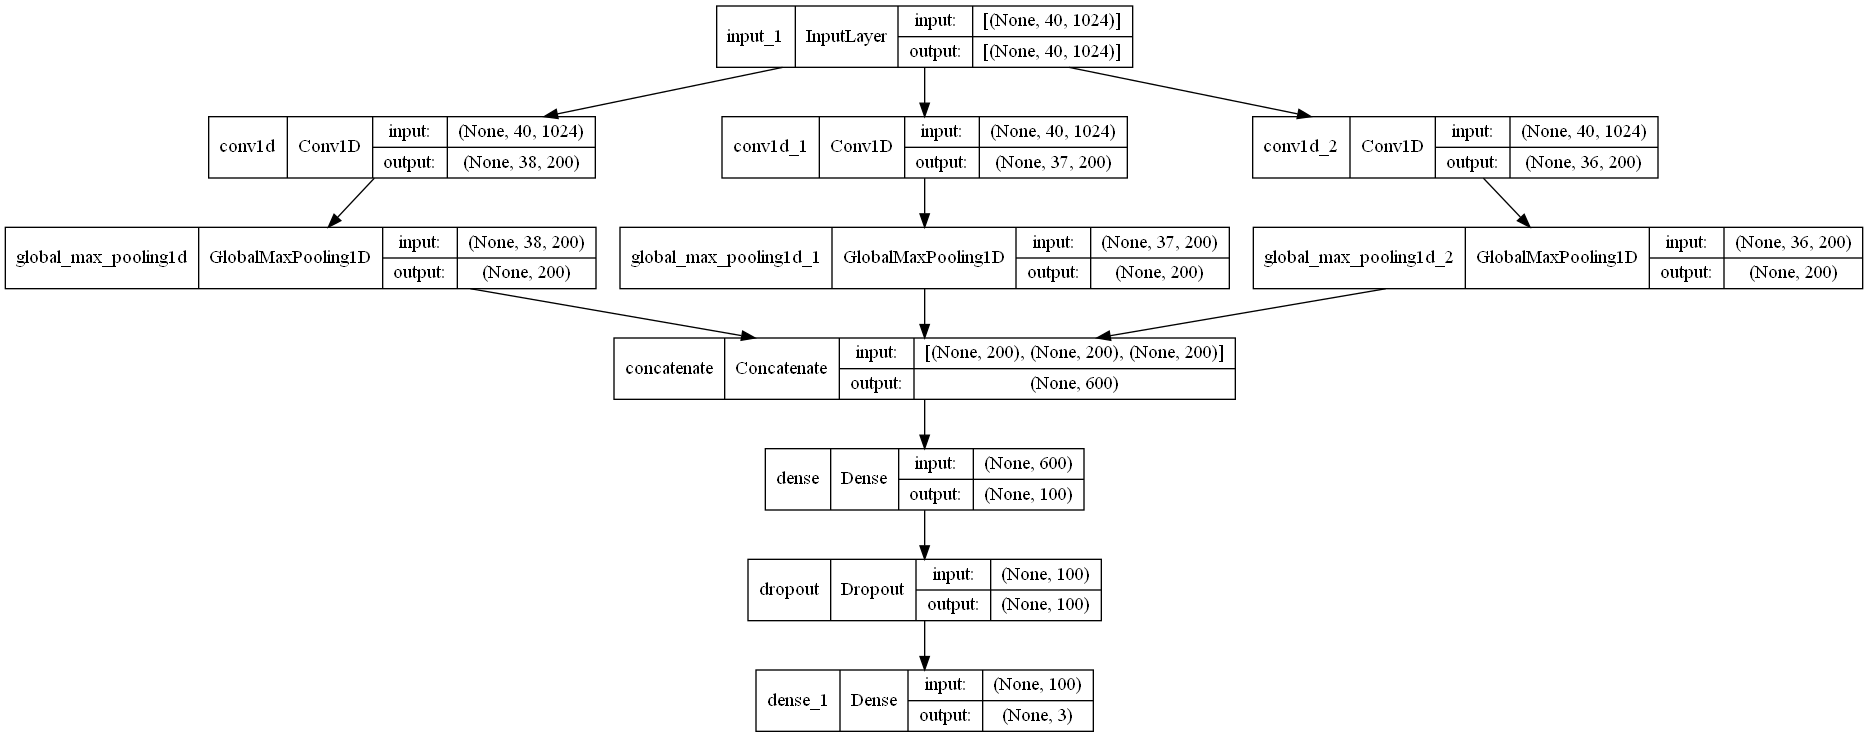

In [12]:
cnn.plot_model()

Train on 350 samples, validate on 62 samples
Epoch 1/10


d:\study\pyenvnn\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


350/350 - 1s - loss: 0.8247 - accuracy: 0.6771 - val_loss: 0.1503 - val_accuracy: 0.9194 - 1s/epoch - 3ms/sample
Epoch 2/10
350/350 - 0s - loss: 0.2346 - accuracy: 0.9143 - val_loss: 0.1838 - val_accuracy: 0.9032 - 143ms/epoch - 410us/sample
Epoch 3/10
350/350 - 0s - loss: 0.1518 - accuracy: 0.9400 - val_loss: 0.0503 - val_accuracy: 1.0000 - 132ms/epoch - 377us/sample
Epoch 4/10
350/350 - 0s - loss: 0.0874 - accuracy: 0.9629 - val_loss: 0.0336 - val_accuracy: 0.9839 - 133ms/epoch - 380us/sample
Epoch 5/10
350/350 - 0s - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0301 - val_accuracy: 0.9839 - 155ms/epoch - 443us/sample
Epoch 6/10
350/350 - 0s - loss: 0.0218 - accuracy: 0.9971 - val_loss: 0.0203 - val_accuracy: 0.9839 - 156ms/epoch - 447us/sample
Epoch 7/10
350/350 - 0s - loss: 0.0106 - accuracy: 0.9971 - val_loss: 0.0150 - val_accuracy: 1.0000 - 133ms/epoch - 381us/sample
Epoch 8/10
350/350 - 0s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000 - 138ms/epoch

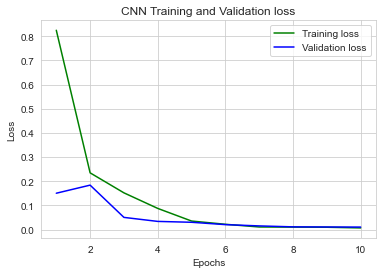

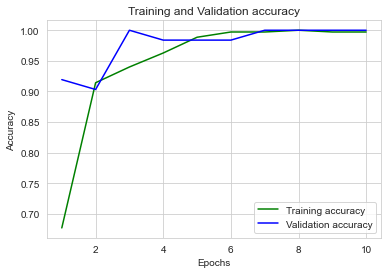

<Figure size 432x288 with 0 Axes>

In [13]:
cnn.fit(train_set)

In [14]:
bilstm = BiLSTM(train_set.X_shape(), hidden_state_dim=500)

In [15]:
bilstm.build()

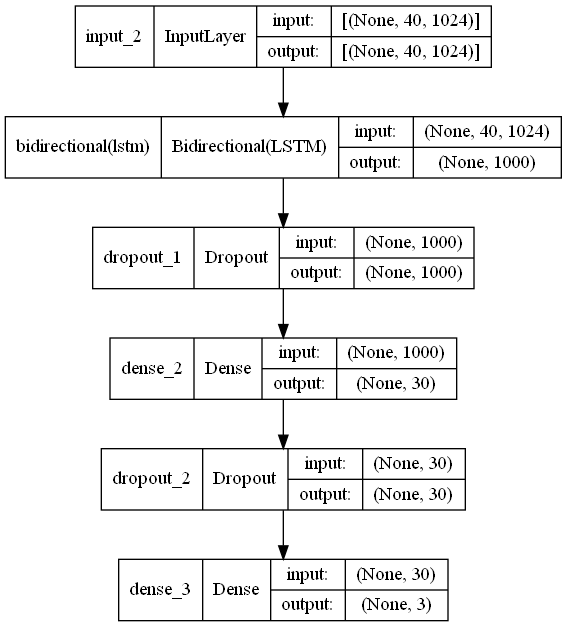

In [16]:
bilstm.plot_model()

Train on 350 samples, validate on 62 samples
Epoch 1/10
350/350 - 2s - loss: 0.6243 - accuracy: 0.6657 - val_loss: 0.1461 - val_accuracy: 0.9355 - 2s/epoch - 5ms/sample
Epoch 2/10
350/350 - 1s - loss: 0.1469 - accuracy: 0.9486 - val_loss: 0.0860 - val_accuracy: 0.9516 - 700ms/epoch - 2ms/sample
Epoch 3/10
350/350 - 1s - loss: 0.0735 - accuracy: 0.9771 - val_loss: 0.0843 - val_accuracy: 0.9677 - 662ms/epoch - 2ms/sample
Epoch 4/10
350/350 - 1s - loss: 0.0356 - accuracy: 0.9914 - val_loss: 0.0489 - val_accuracy: 0.9677 - 721ms/epoch - 2ms/sample
Epoch 5/10
350/350 - 1s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 0.9839 - 670ms/epoch - 2ms/sample
Epoch 6/10
350/350 - 1s - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9839 - 709ms/epoch - 2ms/sample
Epoch 7/10
350/350 - 1s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000 - 673ms/epoch - 2ms/sample
Epoch 8/10
350/350 - 1s - loss: 0.0015 - accuracy: 1.0000 - val_loss:

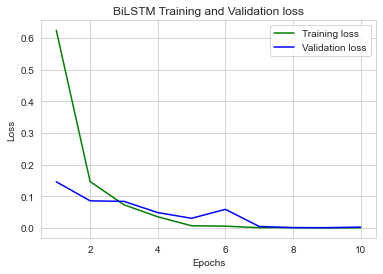

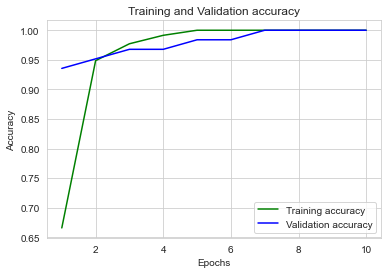

<Figure size 432x288 with 0 Axes>

In [17]:
bilstm.fit(train_set)

In [18]:
cnn_bilstm = Ensemble(cnn, bilstm, train_set)

Train on 350 samples
Epoch 1/10
350/350 [==============================] - 0s 1ms/sample - loss: 0.0297 - accuracy: 0.9914
Epoch 2/10
350/350 [==============================] - 0s 550us/sample - loss: 0.0108 - accuracy: 0.9943
Epoch 3/10
350/350 [==============================] - 0s 402us/sample - loss: 0.0217 - accuracy: 0.9857

In [19]:
cnn_bilstm.fit()

d:\study\pyenvnn\lib\site-packages\mlxtend\classifier\ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "


In [20]:
cnn_bilstm.predict()

Using Testing Set to Predict


d:\study\pyenvnn\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Embeddings loaded successfully


d:\study\pyenvnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


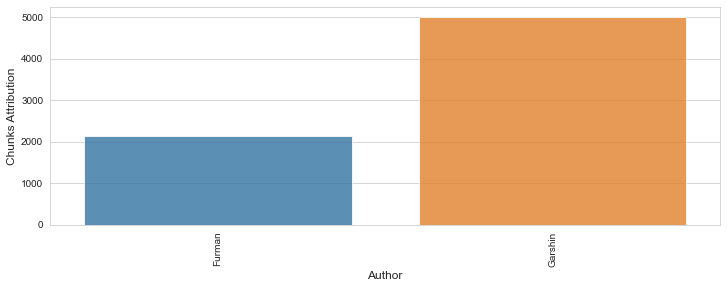

<Figure size 432x288 with 0 Axes>

In [21]:
#path = f"{BOOKS_DIR}/Sholokhov/and-quiet-flows-the-don.txt"
#testing = TestSet(path, names, ELMo)
#testing.dataframe = bilstm.make_prediction(testing)
#testing.plot_prediction()